## Primeiro Trabalho Computacional: Álgebra, Números e Criptografia 2018

### Alifer Sales e Fernanda Scovino

**Data: 04/12/18**


Implementação do teste de Miller-Rabin para geração de números primos grandes.

---

### Teste de primalidade Miller-Rabin

Teste proposto por G.L. Miller em 1976. O teste avalia se um número $n$ é primo tomando por base o teorema de Fermat:

Seja $n$ um número primo e $a$ um número inteiro escolhido aleatoriamente, tal que $1 < b <n-1$. Seja $k=\max\{r\in \mathbb {N} : 2^{r}\mid (n-1)\}$ e $q = \frac{(n-1)}{2^{k}}$. Por definição de $s$, $d$ é necessariamente ímpar.

Sabemos, pelo pequeno teorema de Fermat, que se $n$ é um número primo e $mdc(b, n) = 1$, então $a^{n-1} \equiv b^{2^{k}q}\equiv 1\mod n$. 

Seja $j \geq 1$ o menor expoente tal que $b^{2^{j}q}\equiv 1\mod n$, logo $b^{2^{j}q}\equiv (b^{2^{j-1}q}-1)(b{2^{j-1}q}+1) \equiv 1\mod n$ e n divide b{2^{j-1}q}+1, pois $j$ é o menor expoente tal que $b^{2^{j}q}\equiv 1\mod n$, pu seja,   $b^{2^{j-1}q}\equiv -1\mod n$.

Então, se n é primo, existe um $r\in \{0,1,\cdots ,k-1\}$ tal que $a^{2^{r}d}\equiv -1\mod n$. No caso de $j=0$, pode ser também que $b^{q}\equiv 1 \mod n$.


**Resumo**

* Das amostras geradas, o número de primos classificados errados em cada não ultrapassa 2,6%, somando menos de 2,2% % do total

**Fontes**

[1] *Números Inteiros e Criptografia RSA* — S. C. Coutinho

[2] [*How to generate big prime numbers — Miller-Rabin*. Antoine Prudhomme](https://medium.com/@prudywsh/how-to-generate-big-prime-numbers-miller-rabin-49e6e6af32fb)

[3] [*Teste de primalidade de Miller-Rabin*. Wikipédia](https://pt.wikipedia.org/wiki/Teste_de_primalidade_de_Miller-Rabin)

#### Pacotes auxiliares

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from itertools import combinations
import random

#### Implementação

In [15]:
def checa_primo(n, verbose):
    
    """
    Verifica o teste de primalidade de Miller.
    
    :param n: número candidato a primo
    :param verbose: booleano para exibição dos prints
    """
    
    # Fazemos os testes triviais
    if (n % 2 == 0) or (n % 3 == 0):
        
        if verbose:
            print('O último número testado é composto...')
        return False
    
    # Escolhemos k (número máximo de testes)
    q = n-1
    k = 0
    
    while q % 2 == 0:
        
        q = int(q/2)
        k +=1
    
    # Verificamos se n tem alta probabilidade de ser primo
    for i in range(k):
    
        b = np.random.randint(2, n - 1)
        r = pow(b, q, n)
        
        if (r != 1) and (r != n - 1):
            
            j = 1
            while (j < k) and (r != n - 1):
                
                # elevamos ao quadrado a potência
                r = pow(r, 2, n)
                
                if (r == 1):
                    
                    if verbose:
                        print('O último número testado é composto...')
                    return False
                
                j += 1
            
            if (r != n - 1):
                
                if verbose:
                    print('O último número testado é composto...')
                return False
    
    if verbose:
        print('O número tem altas chances de ser primo!')
    return True

def teste_Miller(t, verbose=True):
    
    """
    Gera um número primo.
    
    :param t: número de testes a ser realizado
    :param verbose: booleano para exibição dos prints
    """
    
    if verbose:
        print('>>> Iniciando Teste 1...')
    
    # Geramos um candidato a primo grande
    n = np.random.randint(10**10, 10**12)
    
    i = 1
    while (not checa_primo(n, verbose)) and (i < t):
        
        if verbose:
            print('>>> Teste {} \n Candidato a primo: {}'.format(i, n))
        n = np.random.randint(10**10, 10**12)
        i += 1
    
    if i <= t:
        
        return n

In [16]:
p = teste_Miller(100)
p

>>> Iniciando Teste 1...
O último número testado é composto...
>>> Teste 1 
 Candidato a primo: 399638026734
O último número testado é composto...
>>> Teste 2 
 Candidato a primo: 195716752519
O último número testado é composto...
>>> Teste 3 
 Candidato a primo: 981271346145
O último número testado é composto...
>>> Teste 4 
 Candidato a primo: 706621774250
O último número testado é composto...
>>> Teste 5 
 Candidato a primo: 139429199437
O último número testado é composto...
>>> Teste 6 
 Candidato a primo: 113836711913
O último número testado é composto...
>>> Teste 7 
 Candidato a primo: 393402269908
O último número testado é composto...
>>> Teste 8 
 Candidato a primo: 330749653760
O último número testado é composto...
>>> Teste 9 
 Candidato a primo: 854654764263
O último número testado é composto...
>>> Teste 10 
 Candidato a primo: 815089848663
O último número testado é composto...
>>> Teste 11 
 Candidato a primo: 987923881098
O último número testado é composto...
>>> Teste 1

739156430063

#### Resultados

Para verificar se o número é efetivamente primo, podemos importar o módulo `simpy.is_prime`.

In [17]:
import sympy as sp

sp.isprime(p)

True

E vamos gerar $100$ amostras com $5000$ números classificados como primos para verificarmos a eficácia do algoritmo.

In [48]:
%%time

amostras = 50
tamanho = 5000

erros = []
for _ in range(amostras):

    primos = np.array([teste_Miller(100, verbose=False) for i in range(tamanho)])
    result = np.array(list(map(lambda x: sp.isprime(x), primos)))
    
    erro = (len(result) - sum(result))/len(result)
    erros.append(erro)

CPU times: user 1min 38s, sys: 288 ms, total: 1min 38s
Wall time: 1min 38s


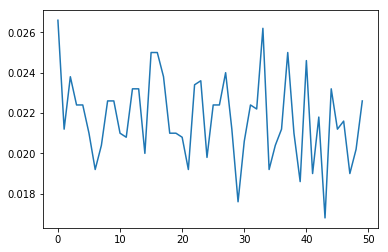

In [49]:
plt.plot(erros)

In [52]:
e_max = max(erros)
e_max

0.0266

Verificamos que, das amostras geradas, o número de primos classificados errados em cada não ultrapassa 2,6%.

In [58]:
e_geral = sum(erros)*tamanho/(amostras*tamanho)
e_geral

0.021748

E o erro geral (razão do número de classificados errados pelo total de números, somando todas as amostras) menor que 2,2%